In [ ]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("books.csv")

In [14]:
# 1. Number of rows and columns in books.csv dataset :

num_of_Rows = len(data)
num_of_Cols = len(data.columns)

print("Number of rows in books dataset :", num_of_Rows)
print("Number of columns in books dataset :", num_of_Cols)


Number of rows in books dataset : 399
Number of columns in books dataset : 24


In [15]:
# 2. Number of books without original title :
# isnull() returns "True" value for each null row in the column "original_title" and sum() gets the count of null rows.

books_without_original_title = data["original_title"].isnull().sum()

print("Number of books without original title :", books_without_original_title)


Number of books without original title : 36


In [16]:
# 3. Number of unique books present in the dataset :
# nunique() gets the number of unique elements in the "original_title" column.

num_of_unique_books = data["original_title"].nunique()

print("Number of unique books present in the dataset :", num_of_unique_books)


Number of unique books present in the dataset : 363


In [17]:
# 4. Average rating of all the books in the dataset based on ‘average_rating’ :

average_rating = data["average_rating"].mean()

print("Average rating of all the books in the dataset :", average_rating)


Average rating of all the books in the dataset : 3.9837844611528817


In [18]:
# 5. Number of books published in the year ‘2000’ based on the ‘original_publication_year’ :

books_published_in_2000 = (data["original_publication_year"] == 2000).sum()

print("Number of books published in the year ‘2000' :", books_published_in_2000)


Number of books published in the year ‘2000' : 8


In [19]:
# 6. Book which has the maximum number of ratings :
# nlargest method gets n rows with the largest value in the "work_ratings_count" column (In this case: n=1)

max_rated_book = data.nlargest(1,"work_ratings_count")["title"].values[0]

print("Book (title) which has the maximum number of ratings :", max_rated_book)


Book (title) which has the maximum number of ratings : The Diary of a Young Girl


C:\Users\selva\AppData\Local\Temp\ipykernel_2516\3988692066.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  books_count = data.groupby('rating_buckets').size()


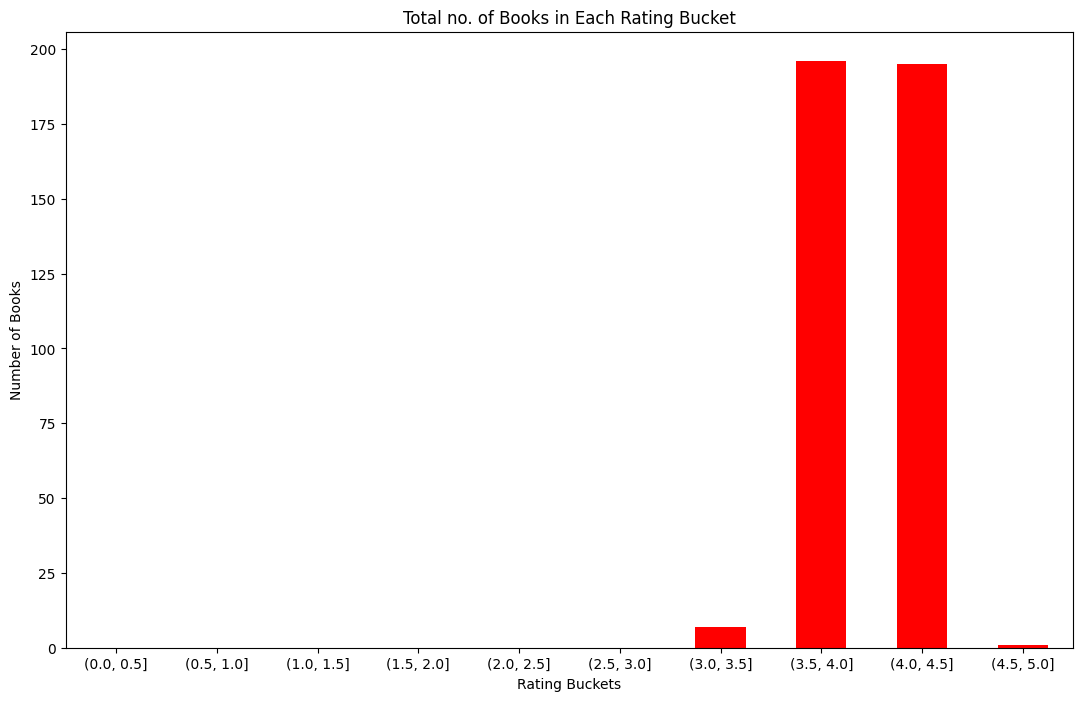

In [22]:
# 7. Plot bar graph to show total number of books in each rating bucket.
# creating rating_buckets with 0.5 decimal rounding, applies the bins to the 'average_rating' column in the dataset

rating_buckets = []
for i in range(11):
    value = round(i*0.5, 1)
    rating_buckets.append(value)

data['rating_buckets'] = pd.cut(data['average_rating'], bins=rating_buckets)
books_count = data.groupby('rating_buckets').size()

plt.figure(figsize=(13,8))
books_count.plot(kind='bar', color='red')
plt.title('Total no. of Books in Each Rating Bucket')
plt.xlabel('Rating Buckets')
plt.ylabel('Number of Books')
plt.xticks(rotation=360)
plt.show()